In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as sts
from scipy.stats import lognorm
from scipy.stats import norm

C:\Users\brend.000\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 150000)

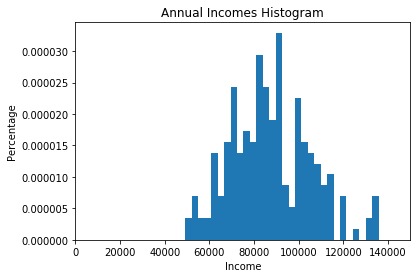

In [46]:
#1a
income = np.loadtxt('incomes.txt')
plt.hist(income,30,normed=True)
plt.title('Annual Incomes Histogram')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.xlim([0, 150000])

Log Likelihood:  -2385.856997808559


Text(0, 0.5, 'Lognormal')

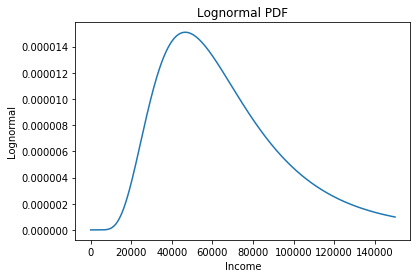

In [47]:
#1b
x = np.linspace(0, 150000, 10000)
lg_pdf = lognorm.pdf(x, s=0.5, scale=np.exp(11.))

income_pdf = lognorm.pdf(income, s=0.5, scale=np.exp(11.))
lg_income = sum(np.log(income_pdf))
print("Log Likelihood: ", lg_income)

plt.plot(x, lg_pdf)
plt.title("Lognormal PDF")
plt.xlabel("Income")
plt.ylabel("Lognormal")

mu:  11.359022995465086 ; sigma:  0.2081773176581541
Value of the likelihood function: 2241.7193013573587
Variance-Covariance Matrix:
  [[ 2.20429404e-04 -9.56905596e-07]
 [-9.56905596e-07  1.08962777e-04]]


C:\Users\brend.000\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


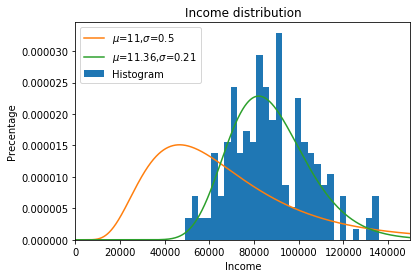

In [48]:
#1c
def crit(params, *args):
    mu, sigma = params
    incomes = args
    income_pdf = lognorm.pdf(incomes, s=abs(sigma), scale=np.exp(mu))
    lg_income = -1*np.log(income_pdf).sum()
    return lg_income

mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
mle_args = income
rslt = opt.minimize(crit, params_init, args=mle_args)
mu, sig = rslt.x
print('mu: ',mu,'; sigma: ',sig)
print('Value of the likelihood function:', rslt['fun'])
print('Variance-Covariance Matrix:\n ', rslt['hess_inv'])

plt.hist(income,30,normed=True,label="Histogram")
plt.plot(x, lg_pdf,label='$\mu$=11,$\sigma$=0.5')
plt.plot(x, lognorm.pdf(x, s=sig, scale=np.exp(mu)),label='$\mu$=11.36,$\sigma$=0.21')
plt.legend(loc='upper left')
plt.xlim([0, 150000])
plt.xlabel("Income")
plt.ylabel("Precentage")
plt.title("Income distribution")
plt.show()

In [49]:
#1d
print('hypothesis: ', lg_income)
loglik_mle = -1 * rslt['fun']
print('MLE log-likelihood', loglik_mle)
LR_val = 2 * (loglik_mle - lg_income)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared with 2 degrees of freedom p-value: ', pval_h0)
print("Chance of actual data coming from (b) is 0.")

hypothesis:  -2385.856997808559
MLE log-likelihood -2241.7193013573587
likelihood ratio value 288.2753929024002
chi squared with 2 degrees of freedom p-value:  0.0
Chance of actual data coming from (b) is 0.


In [50]:
#1e
p1 = 1 - lognorm.cdf(100000, s=sig, scale=np.exp(mu))
p2 = lognorm.cdf(75000, s=sig, scale=np.exp(mu))
print("More than $100,000: ", p1)
print("Less than $75,000: ", p2)

More than $100,000:  0.22986683028905697
Less than $75,000:  0.2602342676581424


In [51]:
#2a
df=pd.read_csv("sick.txt")
def crit2(params,*args):
    b0, b1, b2, b3, sig = params
    y, x1, x2, x3 = args
    eps = y-b0-b1*x1-b2*x2-b3*x3
    pdf = norm(0, abs(sig)).pdf(eps)
    loglik = -1*np.log(pdf).sum()
    return loglik

y, x1, x2, x3=df['sick'],df['age'], df['children'], df['avgtemp_winter']
params = np.array([(0.2,0,0,0,1)])
results = opt.minimize(crit2, params,(y, x1, x2, x3))
b0, b1, b2, b3, sig = results.x
print('beta 0=', b0,'beta 1=', b1, 'beta 2=', b2, 'beta 3=', b3, 'sigma=', sig)
print('log-likelihood:', results['fun']*(-1))
print('variance-covariance matrix:\n',results['hess_inv'])

C:\Users\brend.000\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\brend.000\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\brend.000\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\brend.000\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\brend.000\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


beta 0= 0.25164372858016476 beta 1= 0.012933350575187692 beta 2= 0.40050188069091064 beta 3= -0.009991616356732999 sigma= 0.003018019036541892
log-likelihood: 876.8650559392312
variance-covariance matrix:
 [[ 9.91407375e-07  8.03518921e-09 -1.65197005e-07 -2.23797843e-08
   7.60227084e-09]
 [ 8.03518921e-09  3.90037990e-09 -3.49106900e-08 -2.45524942e-09
   3.34061058e-11]
 [-1.65197005e-07 -3.49106900e-08  3.61063509e-07  2.22583458e-08
  -1.55117692e-11]
 [-2.23797843e-08 -2.45524942e-09  2.22583458e-08  1.92311011e-09
  -1.67674105e-10]
 [ 7.60227084e-09  3.34061058e-11 -1.55117692e-11 -1.67674105e-10
   2.42268284e-08]]


In [52]:
#2b
b0, b1, b2, b3, sig = [1, 0, 0, 0, 0.1]
eps = y - b0 - b1 * x1 - b2 * x2 - b3 * x3
lg = np.log(norm(0, sig).pdf(eps)).sum()
print('hypothesis:', lg)
loglik_mle = -results['fun']
print('MLE log likelihood', loglik_mle)
LR_val = 2 * (loglik_mle - lg)
print('likelihood ratio value', LR_val)
pval = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared with 2 degrees of freedom p-value = ', pval)
print('The likelihood that age number of children and average winter temperature have no effect is 0. ')

hypothesis: -2253.700688042125
MLE log likelihood 876.8650559392312
likelihood ratio value 6261.1314879627125
chi squared with 2 degrees of freedom p-value =  0.0
The likelihood that age number of children and average winter temperature have no effect is 0. 
